# Тема: Keras

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
from keras.models import load_model

import tensorflow as tf

### Используем набор примеров fashion-MNIST

In [2]:
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,)


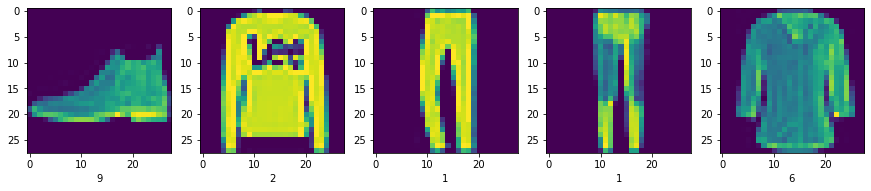

In [3]:
N = 5
plt.figure(figsize=(3 * N, 5))

for i in range(N):
    plt.subplot(1, N, i+1)
    plt.imshow(X_test[i,:].reshape(28, 28))
    plt.xlabel(str(y_test_labels[i]))
plt.show() 

In [4]:
X_train.min(), X_train.max()

(0, 255)

In [5]:
# Нормировка
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.min(), X_train.max()

(0.0, 1.0)

In [6]:
# Вытягивание признаков
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

### 1. Опишите - какой результат нейросети получен в зависимости от:
- числа нейронов в слое (для 2-х слойной сети),
- числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).
- фиксируйте для тренировочного и тестового набора метрики accuracy.

In [7]:
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

stats = pd.DataFrame(columns=['Модель', 'Нейроны', 'Train', 'Test'])

best_metric = 0

In [8]:
def model_two_layers(neuron):
    
    model = Sequential()
    model.add(Dense(neuron[0], input_shape=(28 * 28,), activation='relu'),)
    model.add(Dense(neuron[1], activation='sigmoid'))
    
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=5, batch_size=10, verbose=0)
    
    return model

In [9]:
neurons = [[32, 10], [64, 10], [128, 10]]

for neuron in neurons:
    
    model2 = model_two_layers(neuron)
    
    loss_train, metric_train = model2.evaluate(X_train, y_train, batch_size=10)
    loss_test, metric_test = model2.evaluate(X_test, y_test, batch_size=10)
    
    new_row = {'Модель': '2 слоя', 'Нейроны': neuron, 'Train': metric_train, 'Test':metric_test}
    
    stats = stats.append(new_row, ignore_index=True)

1000/1000 [==============================] - 0s 343us/step - loss: 0.3982 - accuracy: 0.8576


In [10]:
def model_three_layers(neuron):
    
    model = Sequential()
    model.add(Dense(neuron[0], input_shape=(28 * 28,), activation='relu'))
    model.add(Dense(neuron[1], activation='relu'))
    model.add(Dense(neuron[2], activation='sigmoid'))
    
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=5, batch_size=10, verbose=0)
    
    return model

In [11]:
neurons = [[32, 16, 10], [64, 32, 10], [128, 64, 10]]

for neuron in neurons:
    
    model3 = model_three_layers(neuron)
    
    loss_train, metric_train = model3.evaluate(X_train, y_train, batch_size=10)
    loss_test, metric_test = model3.evaluate(X_test, y_test, batch_size=10)
    
    if metric_test > best_metric:
        
        best_metric = metric_test
        model3.save('models/02_dz_best_model.h5')
        
    new_row = {'Модель': '3 слоя', 'Нейроны': neuron, 'Train': metric_train, 'Test':metric_test}
    
    stats = stats.append(new_row, ignore_index=True)

1000/1000 [==============================] - 0s 316us/step - loss: 0.3874 - accuracy: 0.8625


In [12]:
def model_five_layers(neuron):
    
    model = Sequential()
    model.add(Dense(neuron[0], input_shape=(28 * 28,), activation='relu'))
    model.add(Dense(neuron[1], activation='relu'))
    model.add(Dense(neuron[2], activation='relu'))
    model.add(Dense(neuron[3], activation='relu'))
    model.add(Dense(neuron[4], activation='sigmoid'))
    
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=5, batch_size=10, verbose=0)
    
    return model

In [13]:
neurons = [[32, 16, 16, 16, 10], [64, 32, 32, 16, 10], [128, 64, 32, 16, 10]]

for neuron in neurons:
    
    model5 = model_five_layers(neuron)
    
    loss_train, metric_train = model5.evaluate(X_train, y_train, batch_size=10)
    loss_test, metric_test = model5.evaluate(X_test, y_test, batch_size=10)
    
    if metric_test > best_metric:
        
        best_metric = metric_test
        model3.save('models/02_dz_best_model.h5')
    
    new_row = {'Модель': '5 слоев', 'Нейроны': neuron, 'Train': metric_train, 'Test':metric_test}
    
    stats = stats.append(new_row, ignore_index=True)

1000/1000 [==============================] - 0s 365us/step - loss: 0.3741 - accuracy: 0.8670


In [14]:
def model_ten_layers(neuron):
    
    model = Sequential()
    model.add(Dense(neuron[0], input_shape=(28 * 28,), activation='relu'))
    model.add(Dense(neuron[1], activation='relu'))
    model.add(Dense(neuron[2], activation='relu'))
    model.add(Dense(neuron[3], activation='relu'))
    model.add(Dense(neuron[4], activation='relu'))
    model.add(Dense(neuron[5], activation='relu'))
    model.add(Dense(neuron[6], activation='relu'))
    model.add(Dense(neuron[7], activation='relu'))
    model.add(Dense(neuron[8], activation='relu'))
    model.add(Dense(neuron[9], activation='sigmoid'))
    
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=5, batch_size=10, verbose=0)
    
    return model

In [15]:
neurons = [[32, 16, 16, 16, 16, 16, 16, 16, 16, 10], 
           [64, 32, 32, 32, 32, 16, 16, 16, 16, 10], 
           [128, 64, 64, 64, 32, 32, 32, 16, 16, 10]]

for neuron in neurons:
    
    model10 = model_ten_layers(neuron)
    
    loss_train, metric_train = model10.evaluate(X_train, y_train, batch_size=10)
    loss_test, metric_test = model10.evaluate(X_test, y_test, batch_size=10)
    
    if metric_test > best_metric:
        
        best_metric = metric_test
        model3.save('models/02_dz_best_model.h5')
    
    new_row = {'Модель': '10 слоев', 'Нейроны': neuron, 'Train': metric_train, 'Test':metric_test}
    
    stats = stats.append(new_row, ignore_index=True)

1000/1000 [==============================] - 0s 422us/step - loss: 0.3943 - accuracy: 0.8602


In [16]:
stats = stats.sort_values('Нейроны')
stats

,Модель,Нейроны,Train,Test
0,2 слоя,"[32, 10]",0.873133,0.8538
3,3 слоя,"[32, 16, 10]",0.876067,0.8568
6,5 слоев,"[32, 16, 16, 16, 10]",0.875450,0.8552
9,10 слоев,"[32, 16, 16, 16, 16, 16, 16, 16, 16, 10]",0.852250,0.8326
1,2 слоя,"[64, 10]",0.881283,0.8632
4,3 слоя,"[64, 32, 10]",0.879967,0.8608
7,5 слоев,"[64, 32, 32, 16, 10]",0.874333,0.8547
10,10 слоев,"[64, 32, 32, 32, 32, 16, 16, 16, 16, 10]",0.856750,0.8381
2,2 слоя,"[128, 10]",0.875983,0.8576
5,3 слоя,"[128, 64, 10]",0.881467,0.8625


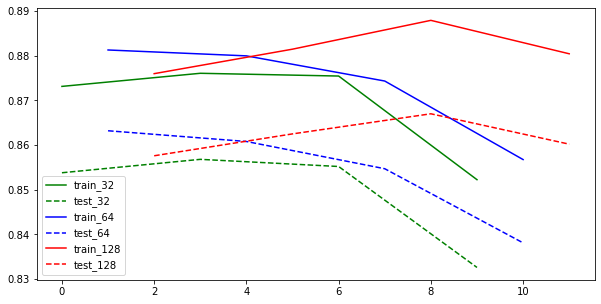

In [17]:
train_acc = stats['Train']
test_acc = stats['Test']

plt.figure(figsize=(10, 5))
plt.plot(train_acc[:4], label='train_32', c='g')
plt.plot(test_acc[:4], label='test_32', c='g', linestyle='--')
plt.plot(train_acc[4:8], label='train_64', c='b')
plt.plot(test_acc[4:8], label='test_64', c='b', linestyle='--')
plt.plot(train_acc[8:], label='train_128', c='r')
plt.plot(test_acc[8:], label='test_128', c='r', linestyle='--')
plt.legend();

**Вывод:**
- увеличение количества нейронов в сети не всегда улучшает качество модели
- увеличение количества слоев без увеличения размера сети не дает ожидаемой линейности (чем больше слоев, тем выше результат).

### 2. Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

In [18]:
model = load_model('models/02_dz_best_model.h5')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [19]:
stats_optim = pd.DataFrame(columns=['Слоев', 'Оптимизатор', 'Train', 'Test'])

optimizers = {'SGD': keras.optimizers.SGD(),
              'RMSprop': keras.optimizers.RMSprop(),
              'Adam': keras.optimizers.Adam()}

model_i = model
layers = len(model.get_config()['layers'])-1

for i, i_optim in optimizers.items():
    
    model_i.compile(loss='categorical_crossentropy', optimizer=i_optim, metrics=['accuracy'])
    
    model_i.fit(X_train, y_train, epochs=5, batch_size=10, verbose=0)

    loss_train, metric_train = model_i.evaluate(X_train, y_train, batch_size=10)
    loss_test, metric_test = model_i.evaluate(X_test, y_test, batch_size=10)
    
    new_row = {'Слоев': layers, 'Оптимизатор': i, 'Train': metric_train, 'Test': metric_test}
    
    stats_optim = stats_optim.append(new_row, ignore_index=True)

1000/1000 [==============================] - 0s 349us/step - loss: 0.4329 - accuracy: 0.8580


### 3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

In [20]:
stats_optim

,Слоев,Оптимизатор,Train,Test
0,3,SGD,0.901533,0.8755
1,3,RMSprop,0.875233,0.8550
2,3,Adam,0.882000,0.8580


**Вывод:**
- качество модели повысилось при применении 3-х слойной нейросети (128, 64, 10) и оптимизатора SGD

### 4. Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).

In [21]:
model_f = model

model_f.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])   
model_f.fit(X_train, y_train, epochs=5, batch_size=10, verbose=0)

predicted_outputs = np.argmax(model_f.predict(X_test), axis=1)
expected_outputs = np.argmax(y_test, axis=1)

predicted_confusion_matrix = confusion_matrix(expected_outputs, predicted_outputs)
print(predicted_confusion_matrix)

[[715   3  25  24   2   0 227   0   4   0]
 [  1 960  14  18   5   0   2   0   0   0]
 [  7   0 839   8  62   0  84   0   0   0]
 [ 14  13  14 874  39   0  42   0   4   0]
 [  0   0 164  27 740   0  69   0   0   0]
 [  0   0   0   1   0 942   0  32   2  23]
 [ 56   0 106  21  54   0 757   0   6   0]
 [  0   0   0   0   0   4   0 967   0  29]
 [  2   1  14   5   4   2  11   3 958   0]
 [  0   0   0   0   0   4   1  35   0 960]]


In [22]:
pred = model_f.predict(X_test)
predicted = np.argmax(pred, axis=1)
report = classification_report(np.argmax(y_test, axis=1), predicted)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1000
           1       0.98      0.96      0.97      1000
           2       0.71      0.84      0.77      1000
           3       0.89      0.87      0.88      1000
           4       0.82      0.74      0.78      1000
           5       0.99      0.94      0.97      1000
           6       0.63      0.76      0.69      1000
           7       0.93      0.97      0.95      1000
           8       0.98      0.96      0.97      1000
           9       0.95      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



**Вывод:**
- к сожалению, не понятно как интерпретировать матрицу ошибок.